# LAIDD Tutorial 2: Chemical reaction using SMARTS patterns
Written by W.-H. Shin @Lab of Structural Bioinformatics, KUCM

July/26/2025

Thanks to Phyo Phyo Kyaw Zin for preparing this Colab.

In [1]:
%%capture
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !pip install rdkit mols2grid

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from IPython.display import Image

# Final goal of this tutorial
We want to run the reaction as below

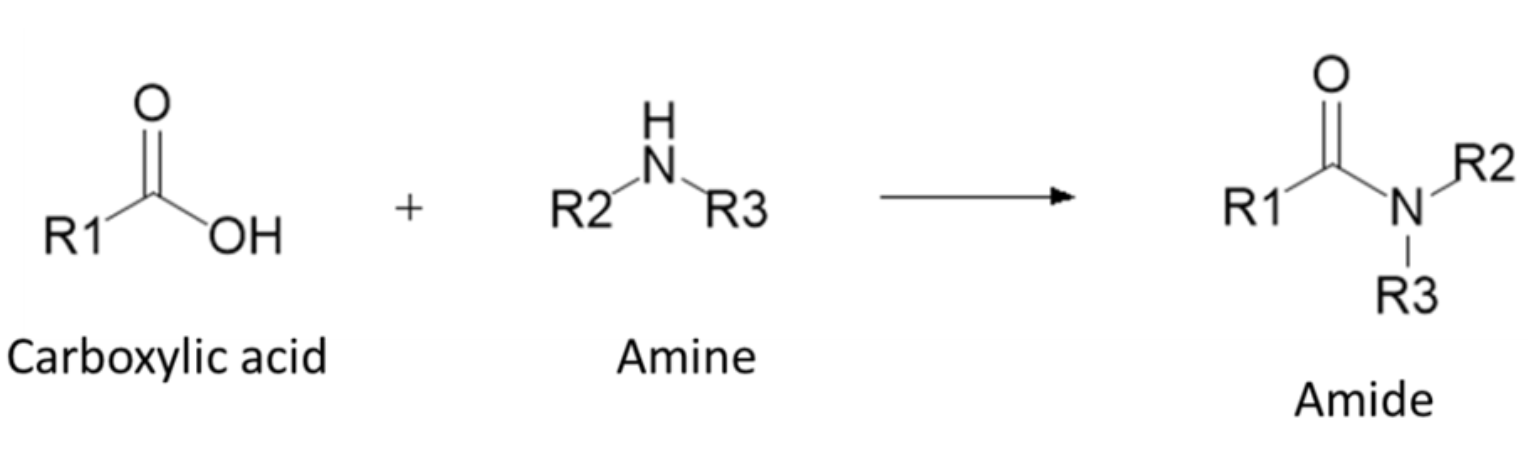

In [ ]:
Image('rxn.png')

# Simple unimolecular reaction
Ketone to carboxylic acid

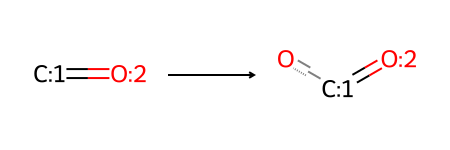

In [3]:
Ketone_to_CarboxylicAcid = "[Ch:1](=[O:2]) >> [C:1](=[O:2])O"
rxn = AllChem.ReactionFromSmarts(Ketone_to_CarboxylicAcid)
rxn

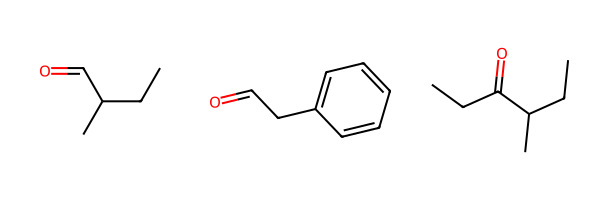

In [4]:
#@title Three initial molecules
s1 = "O=CC(CC)C"
s2 = "O=CCc1ccccc1"
s3 = "C(=O)(C(CC)C)CC"

mol_s1 = Chem.MolFromSmiles(s1)
mol_s2 = Chem.MolFromSmiles(s2)
mol_s3 = Chem.MolFromSmiles(s3)

Chem.Draw.MolsToGridImage([mol_s1, mol_s2, mol_s3])

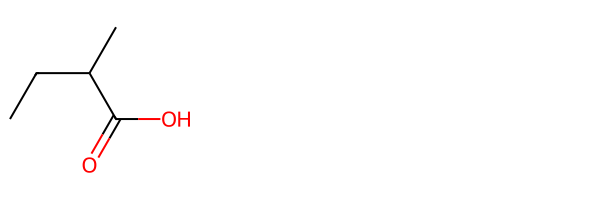

In [6]:
#@title Products
resulting_mols = []
products = rxn.RunReactants((mol_s1,))
for i in range(len(products)):
    current_mol = products[i][0]
    resulting_mols.append(current_mol)

Chem.Draw.MolsToGridImage(resulting_mols)

# Bimolecular reaction
Amide coupling

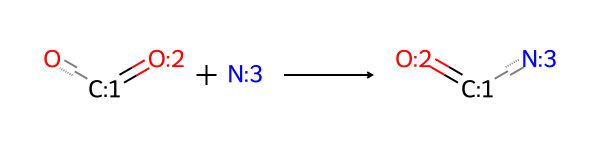

In [7]:
smarts = "[C:1](=[O:2])O.[Nh:3] >> [C:1](=[O:2])[Nh:3]"
amine_coupling_rxn = AllChem.ReactionFromSmarts(smarts)
amine_coupling_rxn

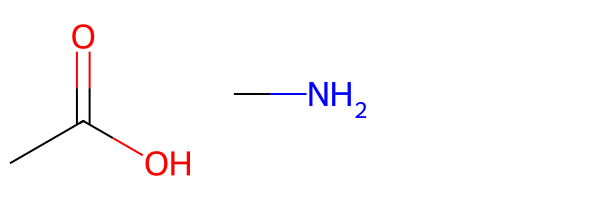

In [9]:
#@title Initial molecules
carboxylic_acid = "C(=O)(O)C"
amine           = "NC"

carboxylic_acid_mol = Chem.MolFromSmiles(carboxylic_acid)
amine_mol           = Chem.MolFromSmiles(amine)

Chem.Draw.MolsToGridImage([carboxylic_acid_mol, amine_mol])

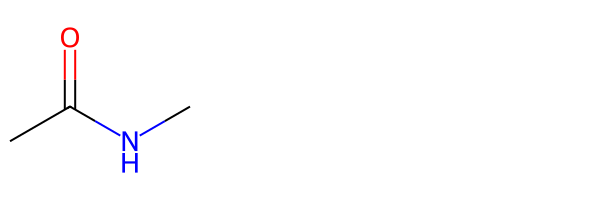

In [10]:
#@title Run reaction to get product
products = amine_coupling_rxn.RunReactants ([carboxylic_acid_mol, amine_mol])
resulting_mol_list = []
for i in range(len(products)):
    resulting_mol_list.append(products[i][0])

Chem.Draw.MolsToGridImage(resulting_mol_list)

In [11]:
#@title Make a function for the reaction
def amide_coupling(smile1, smile2):
    mol1 = Chem.MolFromSmiles(smile1)
    mol2 = Chem.MolFromSmiles(smile2)
    smarts = "[C:1](=[O:2])O.[Nh:3] >> [C:1](=[O:2])[Nh:3]"
    rxn3 = AllChem.ReactionFromSmarts (smarts)
    products = rxn3.RunReactants ([mol1, mol2])
    resulting_smile_list = []
    try:
        for i in range(len(products)):
            resulting_smile = Chem.MolToSmiles(products[i][0])
            resulting_smile_list.append(resulting_smile)
    except:
        pass
    return resulting_smile_list

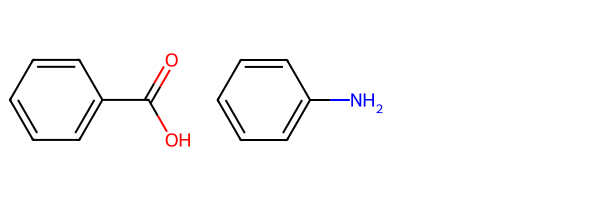

In [12]:
cpd1 = "C(=O)(c1ccccc1)O"
cpd2 = "c1(ccccc1)N"
cpd1_mol = Chem.MolFromSmiles(cpd1)
cpd2_mol = Chem.MolFromSmiles(cpd2)
Chem.Draw.MolsToGridImage([cpd1_mol, cpd2_mol])

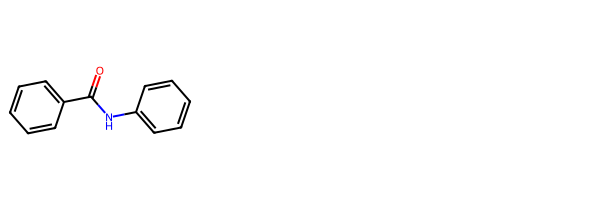

In [13]:
resulting_smiles = amide_coupling(cpd1, cpd2)
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(j) for j in resulting_smiles])

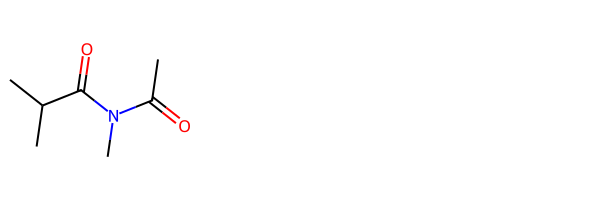

In [ ]:
cpd1 = "C(=O)(C(C)C)O"
cpd2 = "C(=O)(NC)C"
resulting_smiles = amide_coupling(cpd1, cpd2)
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(j) for j in resulting_smiles])